# Lab 7.05 - Time series analysis

In [1]:
# Package imports
# Package imports for data science
import numpy as np
import pandas as pd
import scipy.stats as stats
from pandas.api.types import CategoricalDtype
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic
# Package imports for time series analysis
from datetime import datetime
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_absolute_error,mean_squared_error

### Exercise 5 - Alcoholic beverages sales

The file US Retail.csv contains monthly retail sales of beer, wine, and liquor at U.S. liquor stores.

- Is seasonality present in these data?
- Create a time series chart of the data. Based on what you see, which of the exponential smoothing models do you think should be used for forecasting? Why?
- Split the dataset in a train (1992-01-01 up to and including 2008-12-01) and test set (2009-01-01 up to and including 2009-12-01)  
- Create and train the model. 
- Predict the values for 2009.
- Create a plot with the train data, the fitted values, the test data and the predicted values.
- Calculate MAE

In [16]:
data = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-labs/main/data/US%20Retail.csv', delimiter = ";", parse_dates=['Month']).set_index(['Month'])
data.tail()

,Total Sales
Month,
2009-08-01,3524
2009-09-01,3376
2009-10-01,3536
2009-11-01,3455
2009-12-01,4720


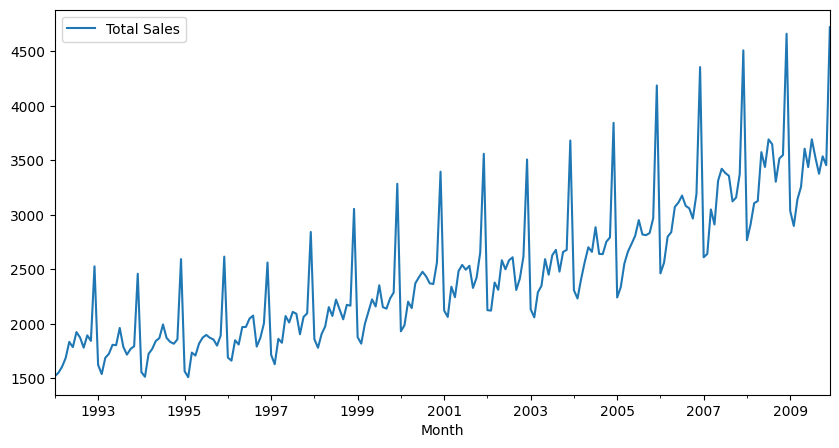

In [11]:
data.plot( y='Total Sales', figsize=[10,5]);

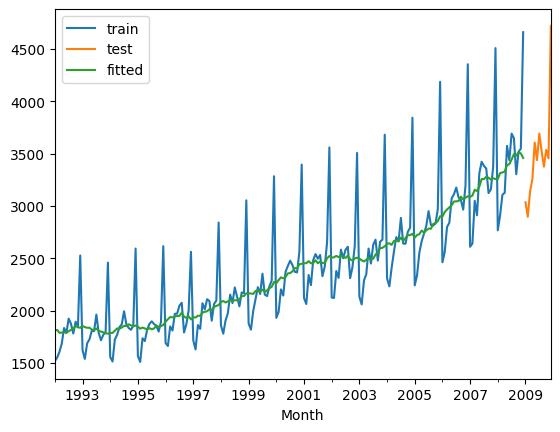

In [15]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

train = data['Total Sales'][:-12]
test = data['Total Sales'][-12:]

alcohol_hw = ExponentialSmoothing(train, trend='add', seasonal='mul', seasonal_periods=12, freq='MS').fit()

train.plot(legend=True, label='train')
test.plot(legend=True, label='test')
(alcohol_hw.level + alcohol_hw.season).plot(legend=True, label='fitted')
alcohol_predicted = alcohol_hw.forecast(12)

In [19]:
data['fittedvalues'] = alcohol_hw.fittedvalues
data['predictedvalues'] = alcohol_predicted
data.tail()

,Total Sales,fittedvalues,predictedvalues
Month,,,
2009-08-01,3524,NaN,3650.607720
2009-09-01,3376,NaN,3459.420118
2009-10-01,3536,NaN,3564.003408
2009-11-01,3455,NaN,3715.697657
2009-12-01,4720,NaN,5083.799322


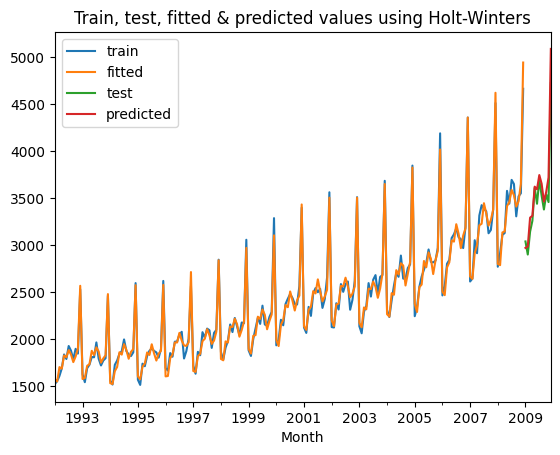

In [20]:
train.plot(legend=True, label='train')
alcohol_hw.fittedvalues.plot(legend=True, label='fitted')

test.plot(legend=True, label='test')
alcohol_predicted.plot(legend=True, label='predicted')

plt.title('Train, test, fitted & predicted values using Holt-Winters');

In [21]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

print(f'MAE = {mean_absolute_error(test,alcohol_predicted)}')

MAE = 119.67786337481066


## Source
Business Analytics Data Analysis & Decision Making 